# Домашнее задание. Выполнил Горшков Тимофей.
Это домашнее задание посвящено полноценному решению задачи машинного обучения.

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров другого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [78]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

# Для начала скачаем нужные файлы с гугл-диска в локальное хранилище, выгрузим основные данные из `train.csv` и применим метод `head()`, чтобы убедиться в корректной выгрузке данных:

In [79]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 82.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 81.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 44.2MB/s]


In [80]:
data = pd.read_csv('./train.csv')

In [81]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [82]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


# Теперь посмотрим на количество объектов nan в датафрейме:

In [83]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

# Отлично, nan отсутствуют, однако на всякий случай вызовем info, посмотреть на сводку по датафрейму.

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

# А вот и первая проблема - колонка `TotalSpent` состоит имеет не числовой тип данных, хотя из head было видно, что там должен стоять тип `float`. Попробуем привести колонку к этому типу.

In [87]:
data['TotalSpent'] = pd.to_numeric(data["TotalSpent"], errors="raise")

ValueError: ignored

# Видно, что при выполнении возникла ошибка, но это нормально, мы потому и поставили `errors="raise"`. Видно, что в проблемной строчке значение имеет вид строки состоящей из пробела. Однако возможно, в этом столбце встречаются и другие виды проблемных значений, выделим все строки, не преобрзующиеся к числу, в отдельный dataframe:

In [101]:
problem = data[pd.to_numeric(data['TotalSpent'], errors="coerce").isna()]
problem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1048 to 4598
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              9 non-null      int64  
 1   MonthlySpending           9 non-null      float64
 2   TotalSpent                9 non-null      object 
 3   Sex                       9 non-null      object 
 4   IsSeniorCitizen           9 non-null      int64  
 5   HasPartner                9 non-null      object 
 6   HasChild                  9 non-null      object 
 7   HasPhoneService           9 non-null      object 
 8   HasMultiplePhoneNumbers   9 non-null      object 
 9   HasInternetService        9 non-null      object 
 10  HasOnlineSecurityService  9 non-null      object 
 11  HasOnlineBackup           9 non-null      object 
 12  HasDeviceProtection       9 non-null      object 
 13  HasTechSupportAccess      9 non-null      object 
 14  HasOnlin

# Всего-то 9 строчек. В принципе, такой dataframe можно и полностью распечатать. Сделаем это, заодно посомтрев на набор уникальных значений в "TotalSpent".

In [102]:
pd.unique(problem["TotalSpent"])

array([' '], dtype=object)

In [103]:
problem

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


# Видно, что проблемные только " ". В целом можно было бы просто выкинуть эти данные, 9 строчек это мало по сравнению с 5000, но эти данные не выглядят как выброс, судя по всему, они означают что человек еще не тратил денег, то есть должны быть заменены на значение 0. Так и сделаем: сначала заменим проблемные места на nan, а затем заполним все nan нулями.

In [105]:
data['TotalSpent'] = pd.to_numeric(data["TotalSpent"], errors="coerce")
data["TotalSpent"] = data["TotalSpent"].fillna(0)
data.info()


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnl

# Колонка пришла к ожидаемому типу `float64`, больше проблем не наблюдается, пора двигаться дальше.

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

# В задании сказано что хорошо построить всё на одном графике - так и сделаем, правда я применяю `subplot` вместо `subplots`, мне так привычнее. За ширину выбираю количество числовых признаков, так они все влезут в одну строчку и график будет легче понимать. Для категориальных признаков буду использовать строить pie charts. С гистограммами числовых признаков интереснее, чтобы убедиться в отсутствии выбросов, увеличу количество разбиений до 50.

[]

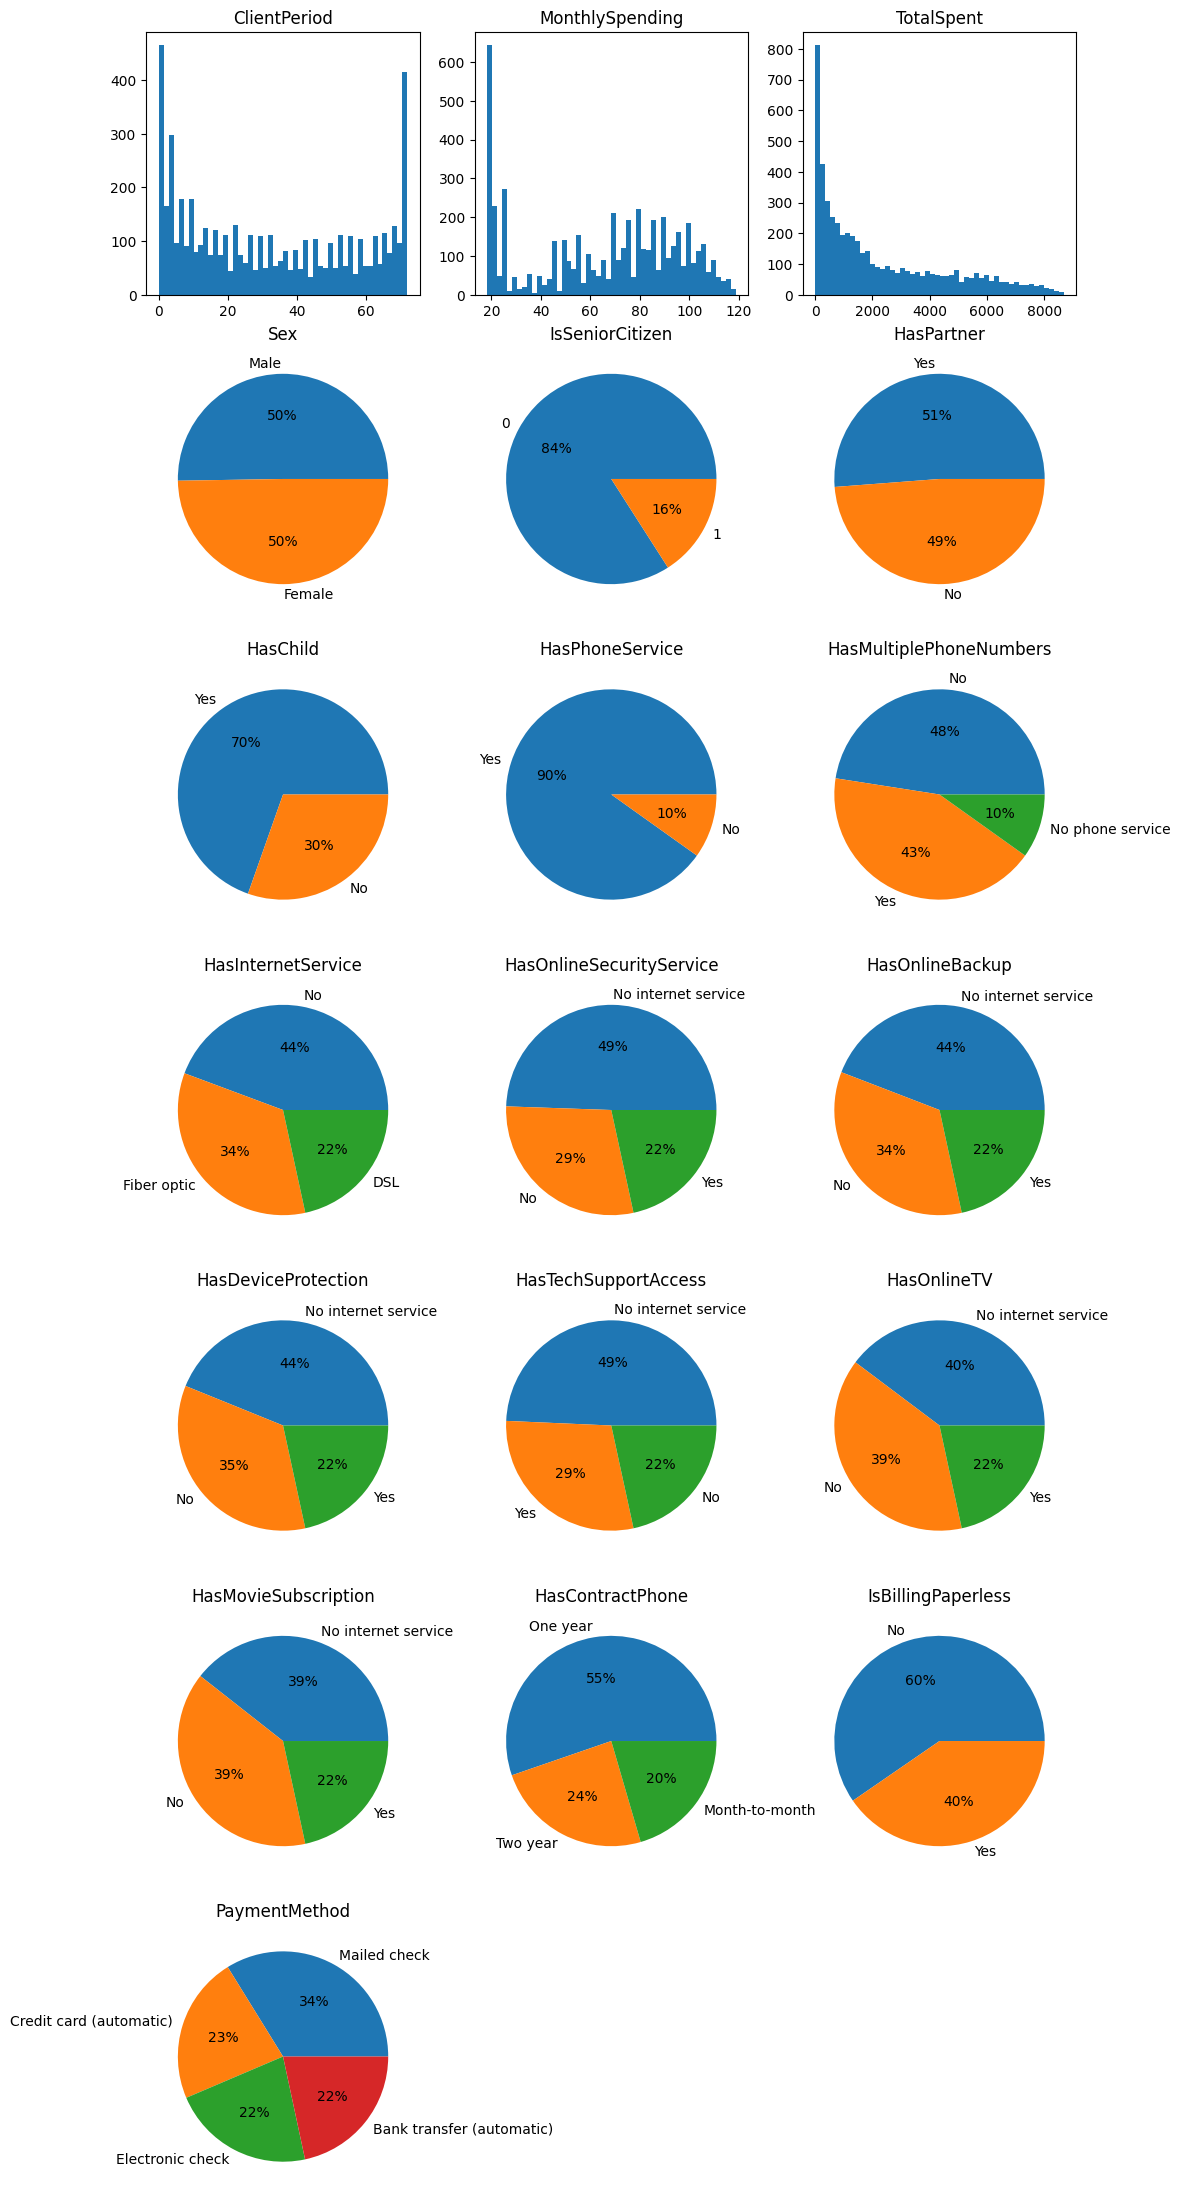

In [106]:
cols = len(num_cols)
rows = len(feature_cols) // len(num_cols) + 1
fig = plt.figure(figsize=(cols * 4, rows * 4))
axs = [plt.subplot(rows, cols, i + 1) for i in range(len(num_cols))]
for i in range(len(num_cols)):
    axs[i].hist(data[num_cols[i]], bins=50)
    axs[i].title.set_text(num_cols[i])
for j in range(len(cat_cols)):
    axs.append(plt.subplot(rows, cols, j + len(num_cols) + 1))
    axs[-1].pie(data[cat_cols[j]].value_counts(), labels=data[cat_cols[j]].unique(), autopct="%.f%%")
    axs[-1].title.set_text(cat_cols[j])
plt.plot()




# Хорошая новость - значительных выбросов на гистограммах не наблюдается. Среди категориальных признаков выделяется **HasPhoneService**, но судя по всему, это тоже не критично.

# Теперь построим pie chart для целевого признака.

0    3898
1    1384
Name: Churn, dtype: int64


([<matplotlib.patches.Wedge at 0x7a7bb0fa7670>,
 [Text(-0.7478930722742168, 0.8066324766857789, '0'),
  Text(0.7478930722742166, -0.8066324766857789, '1')],
 [Text(-0.4079416757859364, 0.4399813509195157, '74%'),
  Text(0.4079416757859363, -0.4399813509195157, '26%')])

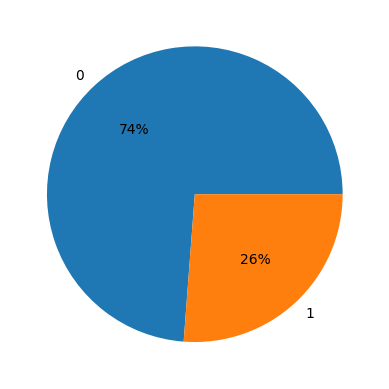

In [107]:
print(data[target_col].value_counts())
plt.pie(data[target_col].value_counts(), labels=data[target_col].unique(), autopct="%.f%%")

# Ну, перекос в сторону класса **0** наблюдается, но о сильной несбалансированности речи не идет - особые методы использовать не будем, хотя от использования метрики **accuracy** на всякий случай воздержимся. **Roc-auc** наше всё.

# Посмотрим также на взаимную корелляцию числовых фич и целевого признака с помощью библиотеки `seaborn`.

<Axes: >

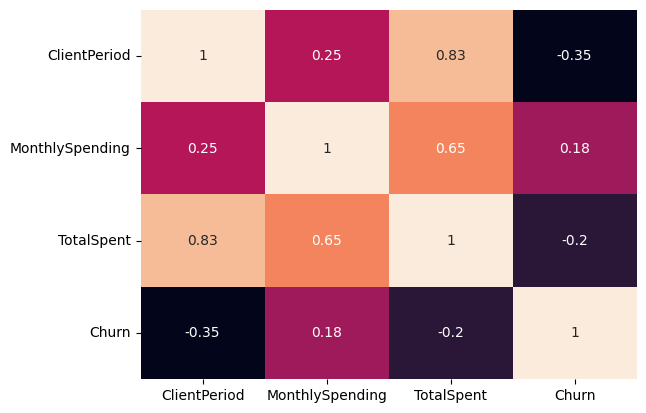

In [112]:
import seaborn as sns
sns.heatmap(data[num_cols + [target_col]].corr(), annot=True, cbar=False)

# Видим что ряд кчисловых признаков немало кореллирует между собой, но не критично, не повод их отбрасывать. Также видим, что ни один из числовых признаков сильно не кореллирует с целевым - основную ставку будем делать на категориальные, вероятно это признак того что решающие деревья должны неплохо себя показать.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [114]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

# Используем `pd.get_dummies` для one-hot encoding категориальных признаков (OneHotEncoder из sklearn хорош для pipelines, но тяжелее при работе с ним руками). Также я создаю новый список категориальных признаков, а заодно создаю копии числовых и целевого, чтобы не запутаться.

In [115]:
enc_data = pd.get_dummies(data, columns = cat_cols, drop_first=True)
enc_cat_cols = list(filter(lambda column: column not in num_cols and column != target_col, enc_data.columns))
enc_num_cols = num_cols
enc_feature_cols = enc_num_cols + enc_cat_cols
enc_target_col = target_col

# Разбиваю выборку на **train** и **test**, а также выполняю нормировку численных признаков. Если вернуться и посомтреть на гистограммы, то видно, что первые два должны хорошо приводиться к нормальному распределению, третий, возможно, лучше заработал бы с `RobustScaler` из-за своей асимметричности, но не будем заморчиваться и применим на все `StandardScaler`.

In [132]:
X_train, X_test, y_train, y_test = train_test_split(enc_data[enc_feature_cols], enc_data[enc_target_col], test_size = 0.2, random_state=42)

scaler = StandardScaler()
X_train[enc_num_cols] = scaler.fit_transform(X_train[enc_num_cols])
X_test[enc_num_cols] = scaler.transform(X_test[enc_num_cols])

# Теперь запустим `LogisticRegressionCV`, который за нас переберет гиперпараметры из списка на обучающей части выборки и выведет лучший по метрике **roc_auc**, а потом переобучится на всей обучающей выборке при лучшем параметре. Далее запустим полученную модель на тестовой выборке, выпишем итоговый **score** и лучший гиперпараметр.

In [133]:
reg_model = LogisticRegressionCV(Cs=[10 ** i for i in range(-3, 3)], scoring="roc_auc", random_state=42, refit=True, max_iter=200)
reg_model.fit(X_train, y_train)
print(f"roc_auc score: {model.score(X_test, y_test)}")
print(f"best C = {reg_model.C_[0]}")

roc_auc score: 0.8269179265060351
best C = 100.0


# Итак, мы выбили **roc_auc = 0.8269** при **С = 100**. Неплохо для логистической регрессии, хотя и не предел мечтаний. Посмотрим что нам даст градиентный бустинг.

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

# Пришло время переустанавливать catboost!

In [122]:
!pip install catboost
import catboost

# На этот раз делим на обучающую и тестовую выборку исходные данные - catboost сам разберется с с нормализацией числовых и энкодингом категориальных признаков.

In [134]:
X = data[feature_cols]
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Создадим и обучим нашу модель с параметрами по умолчанию. Разве что количество итераций увеличим вдвое для повышения точности.

In [135]:
cat_model = catboost.CatBoostClassifier(cat_features = cat_cols, iterations = 2000)

In [136]:
cat_model.fit(X_train, y_train)


Learning rate set to 0.010095
0:	learn: 0.6860327	total: 17.1ms	remaining: 34.3s
1:	learn: 0.6794603	total: 30.1ms	remaining: 30.1s
2:	learn: 0.6724596	total: 43.3ms	remaining: 28.8s
3:	learn: 0.6657389	total: 55.7ms	remaining: 27.8s
4:	learn: 0.6593053	total: 70ms	remaining: 27.9s
5:	learn: 0.6536796	total: 83.7ms	remaining: 27.8s
6:	learn: 0.6474356	total: 97.9ms	remaining: 27.9s
7:	learn: 0.6417517	total: 111ms	remaining: 27.5s
8:	learn: 0.6382065	total: 115ms	remaining: 25.5s
9:	learn: 0.6333317	total: 124ms	remaining: 24.7s
10:	learn: 0.6272268	total: 137ms	remaining: 24.7s
11:	learn: 0.6215900	total: 152ms	remaining: 25.2s
12:	learn: 0.6164001	total: 168ms	remaining: 25.6s
13:	learn: 0.6113268	total: 183ms	remaining: 26s
14:	learn: 0.6064539	total: 198ms	remaining: 26.2s
15:	learn: 0.6018357	total: 213ms	remaining: 26.4s
16:	learn: 0.5973462	total: 224ms	remaining: 26.1s
17:	learn: 0.5926887	total: 242ms	remaining: 26.7s
18:	learn: 0.5881974	total: 256ms	remaining: 26.6s
19:	lear

# Теперь загоним в нашу модель тестовую выборку, посмотрим на score и лучшие параметры.

In [126]:
y_prob = cat_model.predict_proba(X_test)[:, 1]
print(f"roc_auc score: {roc_auc_score(y_test, y_prob)}")

roc_auc score: 0.8246068100590132


In [131]:
print(f"depth = {cat_model.get_all_params()['depth']}")
print(f"learning rate = {cat_model.get_all_params()['learning_rate']}")

depth = 6
learning rate = 0.010095000267028809


# Итак мы получили **roc_auc = 0.8246** при **depth = 6** и **learning rate = 0.01** (возможно надо было еще какие-то параметры посмотреть, но я понял только эти). Эх, а были надежды сходу побить логистическую регрессию. Ну что-же, попробуем перебрать сетку гиперпараметров через `grid_search()`.

# Но встает вопрос: а откуда взять сетку то? После логистической регрессии и параметра по умолчанию из catboost, кажется логичным для learning rate перебрать степени десятки, от -5 до 0. С глубиной дерева проще: явно не имеет смысл смотреть ниже 2, так как тогда дерево вырождается, и выше 7, так как количество листов двоичного дерева растет экспоненциально. Запускаем поиск по решетке и идем заваривать чай - это надолго.

In [144]:
pool = catboost.Pool(data = X_train, label = y_train, cat_features=cat_cols)
cat_model_cv = catboost.CatBoostClassifier(cat_features=cat_cols)
grid = {"learning_rate": [10 ** i for i in range(-5, 1)], "depth": list(range(2, 8))}
cat_model_cv.grid_search(grid, pool)

Выходные данные были обрезаны до нескольких последних строк (5000).
26:	learn: 0.3797979	test: 0.4287283	best: 0.4287283 (26)	total: 449ms	remaining: 16.2s
27:	learn: 0.3797524	test: 0.4287841	best: 0.4287283 (26)	total: 454ms	remaining: 15.7s
28:	learn: 0.3783467	test: 0.4282000	best: 0.4282000 (28)	total: 472ms	remaining: 15.8s
29:	learn: 0.3775283	test: 0.4280566	best: 0.4280566 (29)	total: 489ms	remaining: 15.8s
30:	learn: 0.3738650	test: 0.4283368	best: 0.4280566 (29)	total: 508ms	remaining: 15.9s
31:	learn: 0.3736366	test: 0.4280789	best: 0.4280566 (29)	total: 516ms	remaining: 15.6s
32:	learn: 0.3736320	test: 0.4280907	best: 0.4280566 (29)	total: 521ms	remaining: 15.3s
33:	learn: 0.3730018	test: 0.4283665	best: 0.4280566 (29)	total: 539ms	remaining: 15.3s
34:	learn: 0.3714165	test: 0.4278565	best: 0.4278565 (34)	total: 564ms	remaining: 15.6s
35:	learn: 0.3712840	test: 0.4278117	best: 0.4278117 (35)	total: 584ms	remaining: 15.6s
36:	learn: 0.3710635	test: 0.4274598	best: 0.4274598

{'params': {'depth': 4, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
    

In [145]:
y_prob_cv = cat_model_cv.predict_proba(X_test)[:, 1]
print(f"roc_auc score: {roc_auc_score(y_test, y_prob_cv)}")
print(f"depth = {cat_model_cv.get_all_params()['depth']}")
print(f"learning rate = {cat_model_cv.get_all_params()['learning_rate']}")

roc_auc score: 0.8146396874797981
depth = 4
learning rate = 0.10000000149011612


# Опа, результаты оказались хуже, чем у модели с параметрами по умолчанию: **roc_auc = 0.8146** при **depth = 4** и **learning rate = 0.1**. Вернемся к параметрам по умолчанию, возьмем оттуда глубину, а скорость обучения поварьируем в небольшой окрестности.

In [140]:
pool = catboost.Pool(data = X_train, label = y_train, cat_features=cat_cols)
cat_model_cv = catboost.CatBoostClassifier(cat_features=cat_cols)
grid = {"learning_rate": np.linspace(0.005, 0.015, 10), "depth": [6]}
cat_model_cv.grid_search(grid, pool)


Выходные данные были обрезаны до нескольких последних строк (5000).
26:	learn: 0.5211769	test: 0.5285198	best: 0.5285198 (26)	total: 365ms	remaining: 13.1s
27:	learn: 0.5174313	test: 0.5250452	best: 0.5250452 (27)	total: 379ms	remaining: 13.2s
28:	learn: 0.5135190	test: 0.5214336	best: 0.5214336 (28)	total: 392ms	remaining: 13.1s
29:	learn: 0.5100644	test: 0.5181282	best: 0.5181282 (29)	total: 406ms	remaining: 13.1s
30:	learn: 0.5066695	test: 0.5151625	best: 0.5151625 (30)	total: 420ms	remaining: 13.1s
31:	learn: 0.5033743	test: 0.5121397	best: 0.5121397 (31)	total: 432ms	remaining: 13.1s
32:	learn: 0.5005255	test: 0.5095890	best: 0.5095890 (32)	total: 445ms	remaining: 13s
33:	learn: 0.4980093	test: 0.5072253	best: 0.5072253 (33)	total: 457ms	remaining: 13s
34:	learn: 0.4950773	test: 0.5045729	best: 0.5045729 (34)	total: 474ms	remaining: 13.1s
35:	learn: 0.4921738	test: 0.5020260	best: 0.5020260 (35)	total: 492ms	remaining: 13.2s
36:	learn: 0.4893572	test: 0.4994085	best: 0.4994085 (36

{'params': {'depth': 6, 'learning_rate': 0.013888888888888888},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
      

In [143]:
y_prob_cv = cat_model_cv.predict_proba(X_test)[:, 1]
print(f"roc_auc score: {roc_auc_score(y_test, y_prob_cv)}")
print(f"depth = {cat_model_cv.get_all_params()['depth']}")
print(f"learning rate = {cat_model_cv.get_all_params()['learning_rate']}")

roc_auc score: 0.8265508260913733
depth = 6
learning rate = 0.013888888992369177


# Ура, мы побили регрессию! Правда не сказать чтобы сильно. Итак, **roc_auc = 0.8266** при **depth = 6** и **learning rate = 0.014**.  Мораль - параметры по умолчанию действительно хорошо подбираются, ну и да, **catboost** действительно показал себя лучше логистической регрессии. Его результаты и будем загружать на **kaggle / stepik**.

# Предсказания

In [ ]:
best_model = cat_model_cv

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

X_test['TotalSpent'] = pd.to_numeric(data["TotalSpent"], errors="coerce")
X_test["TotalSpent"] = X_test["TotalSpent"].fillna(0)

# X_test[num_cols] = scaler.transform(X_test[enc_num_cols]) # нужно было бы раскомментировать, если бы лучшей моделью оказалась логистическая регрессия
# X_test = pd.get_dummies(X_test, columns = cat_cols, drop_first=True)

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
print(submission.shape)
submission.to_csv('my_submission.csv', index=False)

(1761, 2)


# Отмечу что на **kaggle** были протестированы разные посылки, включая вариации модели с выкидыванием строчек где стояли " " в "TotalSpent", но это не дало хороших результатов. Для тех моделей, что в итоге остались в данном ноутбуке, на submission логистическая регрессия дает **roc_auc = 0.8079**, в то время как catboost дал **roc_auc = 0.8442**, что и позволило перейти требуемую границу.

# Спасибо что таки дочитали до этого момента, старался все подробно объяснить, но если вдруг что непонятно, со мной можно связаться через телеграм: https://t.me/urnguk